## Importer, Visualiser et Preparer les données

#### Importer packadges et données

In [1]:
# Importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

from utils import *

In [2]:
# Importer les données
df = pd.read_csv('iphone_purchase_records.csv')
# afficher les données
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
# infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


#### Visualisations

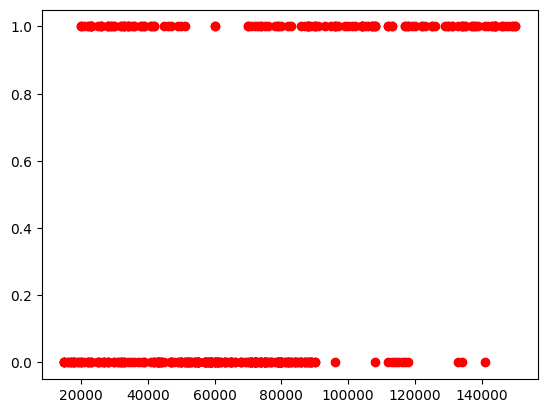

In [4]:
# Visualiser le scatter plot de la detention d'Iphone ou non en  fonction du Salaire
plt.scatter(df.Salary.values, df['Purchase Iphone'].values, color = 'red')
plt.show()

#### Préparation des données

In [5]:
# Objet encoder
encoder = LabelEncoder()
# Encodage
df['Gender'] = encoder.fit_transform(df['Gender'])

df.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [34]:
# Fractionner les données
X = df.drop('Purchase Iphone', axis = 1).values
Z = df.drop('Purchase Iphone', axis = 1).values
y = df['Purchase Iphone'].values

In [35]:
# Normaliser les données
standard = StandardScaler()
X = standard.fit_transform(X)

In [8]:
# Splitter les données d'entrainement et test
x_train,x_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
# Splitter en données validation et test
x_val,x_test,y_val, y_test = train_test_split(x_test,y_test, test_size = 0.5, random_state=42)

In [9]:
# Afficher les dimensions
print("Dimension des données train:  ", x_train.shape, y_train.shape)
print("Dimension des données validation:  ", x_val.shape, y_val.shape)
print("Dimension des données test:  ", x_test.shape, y_test.shape)

Dimension des données train:   (320, 3) (320,)
Dimension des données validation:   (40, 3) (40,)
Dimension des données test:   (40, 3) (40,)


## Modélisation

#### Logistic regression

In [10]:
from sklearn.linear_model import LogisticRegression
# Recherche de paramètres optimaux
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']
}
lg = LogisticRegression()
grid_lg = GridSearchCV(lg, params, cv =5)
grid_lg.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']})

In [11]:
# Paramètres optimaux
grid_lg.best_params_

{'C': 1, 'solver': 'newton-cg'}

In [12]:
# Initialiser le modèle avec les paramètres optimaux
log_reg = LogisticRegression(C = 1, solver = 'newton-cg')
# Entrainer le modèle
log_reg.fit(x_train,y_train)

LogisticRegression(C=1, solver='newton-cg')

In [13]:
# Accuracy du modèle
y_pred_lr = log_reg.predict(x_val)
print('Accuracy : ', accuracy_score(y_pred_lr, y_val),'----', 'F1 score : ', f1_score(y_pred_lr, y_val))

Accuracy :  0.875 ---- F1 score :  0.8


In [14]:
# y_pred_lr = log_reg.predict(x_test)
# for i in range(10):
#   print('Individu ',str(i), 'a un iphone' if y_pred_lr[i] == 0 else "n'a pas d'iphone", ' --- ' ,'Vrai' if y_test[i] == y_pred_lr[i] else 'Faux')


In [15]:
# plot_confusion_matrix(confusion_matrix(y_test, y_pred_lr), ['Not Iphone', 'Iphone'])

In [16]:
import plotly.graph_objects as go

In [17]:
W = log_reg.coef_.T
# print(W.shape)
b = log_reg.intercept_[0]
# print(b)

In [18]:
X0 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X1 = np.linspace(X[:, 2].min(), X[:, 2].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 1].flatten(), y=X[:, 2].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

#### Support vectors machines

In [19]:
from sklearn.svm import SVC
# Recherche de paramètres optimaux
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'sigmoid', 'rbf']
}
svm_model = SVC()
grid_svm = GridSearchCV(svm_model, params, cv =5)
grid_svm.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'sigmoid', 'rbf']})

In [20]:
# Paramètres  optimaux
grid_svm.best_params_

{'C': 10, 'kernel': 'rbf'}

In [21]:
# Initialiser le modèle avec les paramètres optimaux
svm_mod = SVC(C  =10, kernel = 'rbf')
# Entrainer le modèle
svm_mod.fit(x_train,y_train)

SVC(C=10)

In [22]:
# Evaluer le modèle
# Accuracy du modèle
y_pred_svm = svm_mod.predict(x_val)
print('Accuracy : ', accuracy_score(y_pred_svm, y_val),'----', 'F1 score : ', f1_score(y_pred_svm, y_val))

Accuracy :  0.925 ---- F1 score :  0.896551724137931


In [24]:
# plot_confusion_matrix(confusion_matrix(y_test, y_pred_svm), ['Not Iphone', 'Iphone'])

#### K-Nearest Neighbours

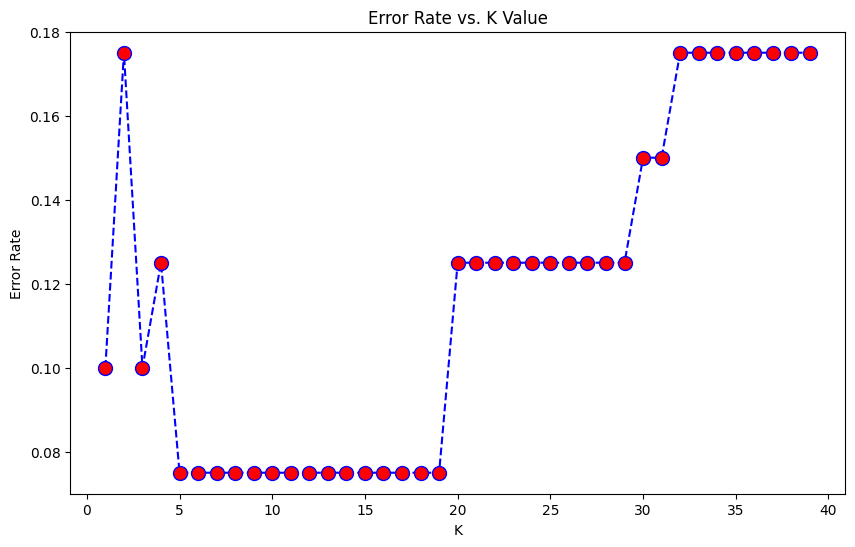

In [25]:
K_choice(x_train, y_train, x_test, y_test)

In [26]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_val)
print('Accuracy : ', accuracy_score(y_pred_knn, y_val),'----', 'F1 score : ', f1_score(y_pred_knn, y_val))

Accuracy :  0.95 ---- F1 score :  0.9285714285714286


## Le modele de le plus pérformant

Le modele KNN est le plus pérformant avec le meilleur pourcentage du nombre total de prédictions
correctes et le meilleur score f1

#### Prédictions avec KNN

In [27]:
y_pred_knn = knn.predict(x_test)
for i in range(10):
  print('Individu ',str(i), 'a un iphone' if y_pred_knn[i] == 0 else "n'a pas d'iphone", ' --- ' ,'Vrai' if y_test[i] == y_pred_knn[i] else 'Faux')

Individu  0 n'a pas d'iphone  ---  Vrai
Individu  1 n'a pas d'iphone  ---  Faux
Individu  2 n'a pas d'iphone  ---  Vrai
Individu  3 a un iphone  ---  Vrai
Individu  4 a un iphone  ---  Vrai
Individu  5 n'a pas d'iphone  ---  Vrai
Individu  6 a un iphone  ---  Vrai
Individu  7 n'a pas d'iphone  ---  Vrai
Individu  8 a un iphone  ---  Vrai
Individu  9 a un iphone  ---  Vrai


[[24  1]
 [ 2 13]]


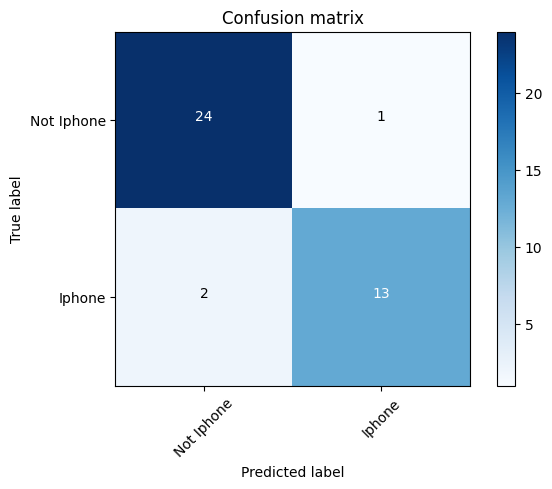

In [28]:
# Afficage de la matrice de confusion
plot_confusion_matrix(confusion_matrix(y_test, y_pred_knn), ['Not Iphone', 'Iphone'])

In [29]:
import pickle

In [30]:
# Enregistrer notre model Linear
data = {'model': knn, 'standard': standard}
with open('model_knn_std.pkl', 'wb') as file:
    pickle.dump(data, file)
# pickle.dump(knn, open(data, 'wb'))